# Problem 1: The Maze and the Random Minotaur

The objective of problem 1 is to solve the maze and the random minotaur problem. We start first by describing the maze as a numpy array. 

In [10]:
import problem1.maze as mz
import numpy as np
import matplotlib.pyplot as plt

## Part A

In [11]:
# Description of the maze as a numpy array
maze = np.array([
    [2, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 3, 0, 0],
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = Beginning of the Maze
# 3 = exit of the Maze

The method `maze.draw_maze()` helps us draw the maze given its numpy array discription.  

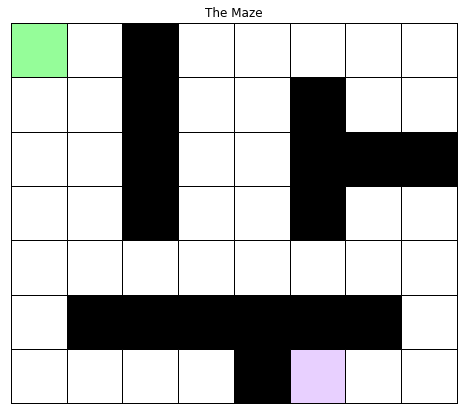

In [12]:
mz.draw_maze(maze)

## Part B

In [13]:
# Create an environment maze
MinotaurStay = False
env = mz.Maze(maze, MinotaurStay)
#env.show()

In [14]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);

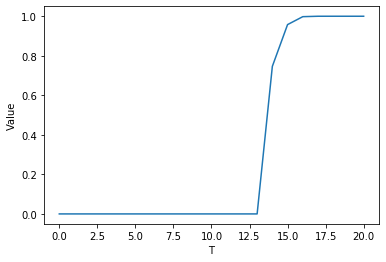

In [15]:
start  = (0,0,6,5)
value = np.flip(V[env.map[start]])
plt.plot(value)
plt.ylabel("Value")
plt.xlabel("T")
plt.show()

In [16]:
# Simulate the shortest path starting from position A
method = 'DynProg';
path = env.simulate(start, policy, method);

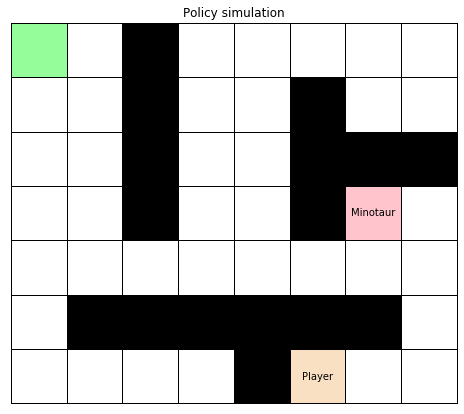

In [17]:
# Show the shortest path 
mz.animate_solution(maze, path, start)

## Part C

In [18]:
# Create an environment maze
MinotaurStay = False
env = mz.Maze(maze, MinotaurStay)
#env.show()

In [19]:
# Discount Factor 
gamma   = 29/30; 
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon)

In [20]:
num_simulations = 10000
method = 'ValIter';
start  = (0,0,6,5);
exit = 0
for i in range(num_simulations):
    path = env.simulate(start, policy, method)
    if[path[-1][0:2] == start[2:]]:
        exit +=1
print("Probability of exiting the maze =", exit/num_simulations)

Probability of exiting the maze = 1.0


# Problem 2: Robbing Banks

The objective of problem 2 is to solve the robbing banks problem. We start first by describing the maze as a numpy array. 

In [21]:
import numpy as np
import problem2.maze as mz
import matplotlib.pyplot as plt

# Part A

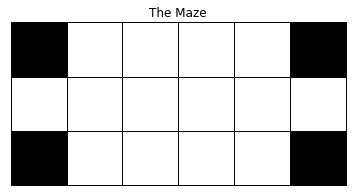

In [22]:
maze = np.array([
    [1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1],
])
# Description of the maze as a numpy array
# with the convention 
# 0 = empty cell
# 1 = bank
mz.draw_maze(maze)

In [3]:
# Create an environment maze
env = mz.Maze(maze)
#env.show()

## Part B

In [4]:
start  = (0,0,1,2)
# Discount Factors
GAMMA = np.arange(0.1, 1, 0.01)
# Accuracy treshold 
epsilon = 0.0001
value = []
for gamma in GAMMA:
    V, policy = mz.value_iteration(env, gamma, epsilon)
    value.append(V[env.map[start]])

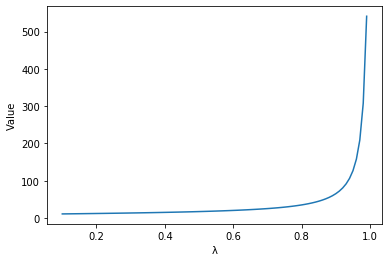

In [5]:
plt.plot(GAMMA, value)
plt.ylabel("Value")
plt.xlabel("λ")
plt.show()

In [23]:
start  = (0,0,1,2)
# Discount Factors
gamma = 0.99
# Accuracy treshold 
epsilon = 0.0001

V, policy = mz.value_iteration(env, gamma, epsilon)

In [24]:
method = 'ValIter'
start  = (0, 0, 1, 2)
path = env.simulate(start, policy, method)

KeyError: (0, 0, 1, 2)

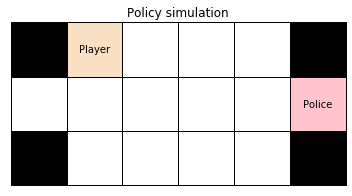

In [8]:
# Show the shortest path 
mz.animate_solution(maze, path, start)

# Problem 3

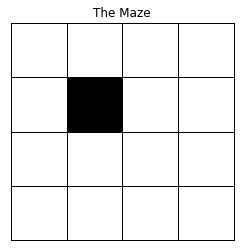

In [25]:
import numpy as np
import problem3.maze as mz

# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
])
# with the convention 
# 0 = empty cell
# 1 = bank
mz.draw_maze(maze)

# Create an environment maze
env = mz.Maze(maze)

#env.show()

## Q-learning

In [26]:
# Q-learning for different intial states
initialStates = [(0,0,3,3), (3,3,0,0), (2,2,2,2), (1,3,2,2)]
value = []
for i, s in enumerate(initialStates):
    print(i)
    Q, v = mz.Q_learning(env,iters=100000, start = s)
    value.append(v)                                                 

0
1
2
3


In [27]:
print(np.max(Q))
print(Q)

4.122394537530436
[[ 1.82806382  1.83889631 -3.16875857  1.82486864 -3.12155106]
 [-1.74284341 -1.72018251  2.34365634 -1.70807943  2.33561502]
 [ 1.98894756  2.0484102  -1.03315778  2.04702024  2.41579254]
 ...
 [ 1.3022305  -1.98784548  1.32213687  1.4987393   1.2870488 ]
 [-2.27174785  1.77726308 -2.26049825  1.77792546 -2.29106311]
 [ 1.337228   -3.50067966  1.37735157 -3.47055831  1.38648317]]


/Users/jonrunar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


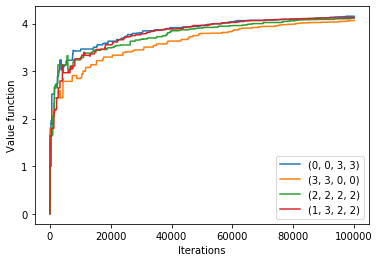

In [28]:
# Plot it
from matplotlib import pyplot as plt
for i in range(len(value)):
    plt.plot(value[i], label=str(initialStates[i]))
plt.xlabel("Iterations")
plt.ylabel("Value function")
plt.legend()
plt.show()

## SARSA

In [29]:
# Sarsa for different epsilons
initialState = (0,0,3,3)
epsilons = [0.0, 0.1, 0.2, 0.5, 0.8, 1.0]
value = []
for i,e in enumerate(epsilons):
    print(i)
    Q, v = mz.Sarsa(env,iters=100000, start = initialState, epsilon=e)
    value.append(v)

0
1
2
3
4
5


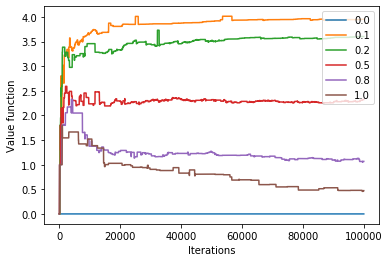

In [30]:
# Plot it
from matplotlib import pyplot as plt
for i in range(len(value)):
    l = str(epsilons[i])
    plt.plot(value[i], label=l)
plt.xlabel("Iterations")
plt.ylabel("Value function")
plt.legend(loc=1)
plt.show()